In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df1 = pd.read_csv("Plant_1_Generation_Data.csv")
df2 = pd.read_csv("Plant_1_Weather_Sensor_Data.csv")

In [4]:
df1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [5]:
df2.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,5/15/2020 0:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,5/15/2020 0:15,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,5/15/2020 0:30,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,5/15/2020 0:45,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,5/15/2020 1:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


In [8]:
df1['DATE_TIME'] = df1['DATE_TIME'].astype('datetime64[ns]')
df2['DATE_TIME'] = df2['DATE_TIME'].astype('datetime64[ns]').replace('/','-')

In [9]:
df2.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [10]:
df = pd.merge(df1,df2, how='left', on='DATE_TIME')

In [11]:
df

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,4135001.0,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0
68774,2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,4135001.0,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0
68775,2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,4135001.0,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0
68776,2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,4135001.0,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0


<Axes: >

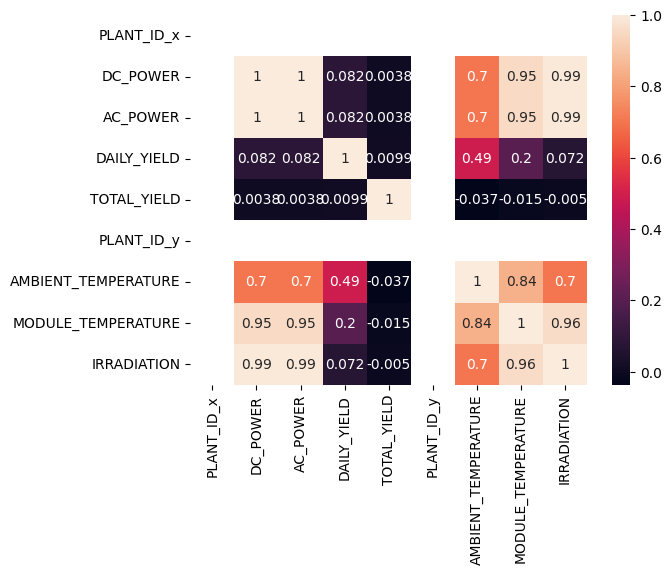

In [12]:
sns.heatmap(df.corr(numeric_only=True), annot= True)

<Axes: xlabel='DC_POWER', ylabel='Count'>

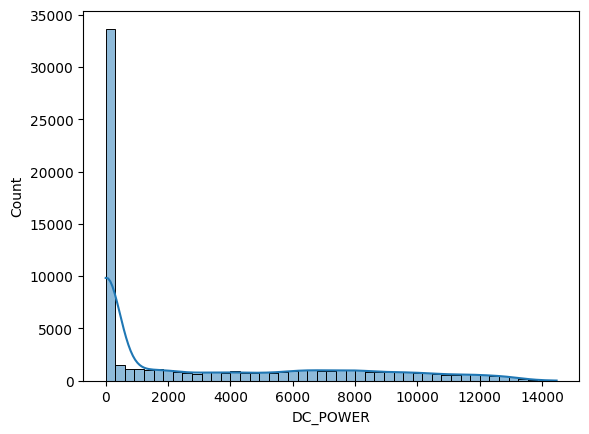

In [13]:
sns.histplot(df['DC_POWER'],  kde=True)

In [14]:
df['DATE'] = df['DATE_TIME'].dt.date

### Droping Unwanted Columns

In [15]:
df = df.drop(columns=['PLANT_ID_x', 'SOURCE_KEY_x','PLANT_ID_y', 'SOURCE_KEY_y'])

In [16]:
df.head()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE
0,2020-05-15,0.0,0.0,0.0,6259559.0,25.184316,22.857507,0.0,2020-05-15
1,2020-05-15,0.0,0.0,0.0,6183645.0,25.184316,22.857507,0.0,2020-05-15
2,2020-05-15,0.0,0.0,0.0,6987759.0,25.184316,22.857507,0.0,2020-05-15
3,2020-05-15,0.0,0.0,0.0,7602960.0,25.184316,22.857507,0.0,2020-05-15
4,2020-05-15,0.0,0.0,0.0,7158964.0,25.184316,22.857507,0.0,2020-05-15


In [17]:
df.isna().sum()

DATE_TIME                  0
DC_POWER                   0
AC_POWER                   0
DAILY_YIELD                0
TOTAL_YIELD                0
AMBIENT_TEMPERATURE    23098
MODULE_TEMPERATURE     23098
IRRADIATION            23098
DATE                       0
dtype: int64

In [18]:
df.shape

(68778, 9)

In [19]:
# We know we don't want night time data 

df = df[df['IRRADIATION'] != 0.0]

In [20]:
df.isna().sum()

DATE_TIME                  0
DC_POWER                   0
AC_POWER                   0
DAILY_YIELD                0
TOTAL_YIELD                0
AMBIENT_TEMPERATURE    23098
MODULE_TEMPERATURE     23098
IRRADIATION            23098
DATE                       0
dtype: int64

In [21]:
df = df.fillna(method = 'ffill')

In [22]:
df.isna().sum()

DATE_TIME              0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DATE                   0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48790 entries, 489 to 68337
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            48790 non-null  datetime64[ns]
 1   DC_POWER             48790 non-null  float64       
 2   AC_POWER             48790 non-null  float64       
 3   DAILY_YIELD          48790 non-null  float64       
 4   TOTAL_YIELD          48790 non-null  float64       
 5   AMBIENT_TEMPERATURE  48790 non-null  float64       
 6   MODULE_TEMPERATURE   48790 non-null  float64       
 7   IRRADIATION          48790 non-null  float64       
 8   DATE                 48790 non-null  object        
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 3.7+ MB


<Axes: xlabel='DC_POWER', ylabel='Count'>

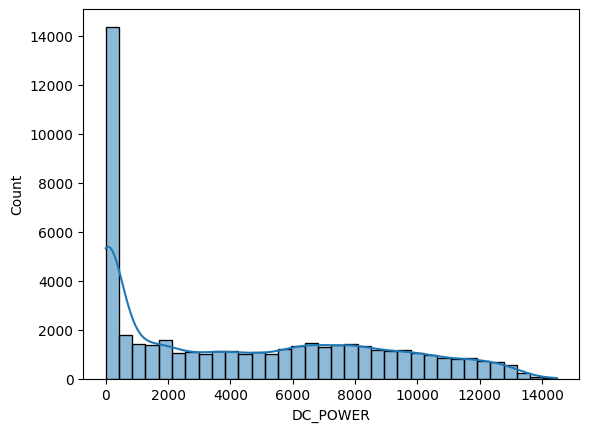

In [24]:
sns.histplot(df['DC_POWER'],  kde=True)

#### Adding New Features

In [25]:
daily_data = df.groupby('DATE')['DC_POWER'].mean()
df['DAY_DC_POWER'] = df['DATE'].map(daily_data)

In [26]:
weekly_sum = daily_data.rolling(window=7).sum()
df['WEEK_DC_POWER'] = df['DATE'].map(weekly_sum)

In [27]:
df['WEEK_DC_POWER'].fillna(0, inplace= True)

df

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,DAY_DC_POWER,WEEK_DC_POWER
489,2020-05-15 05:45:00,0.0,0.0,0.0,6259559.0,24.289211,23.096692,0.000863,2020-05-15,4813.720396,0.000000
490,2020-05-15 05:45:00,0.0,0.0,0.0,6183645.0,24.289211,23.096692,0.000863,2020-05-15,4813.720396,0.000000
491,2020-05-15 05:45:00,0.0,0.0,0.0,6987759.0,24.289211,23.096692,0.000863,2020-05-15,4813.720396,0.000000
492,2020-05-15 05:45:00,0.0,0.0,0.0,7602960.0,24.289211,23.096692,0.000863,2020-05-15,4813.720396,0.000000
493,2020-05-15 05:45:00,0.0,0.0,0.0,7158964.0,24.289211,23.096692,0.000863,2020-05-15,4813.720396,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
68333,2020-06-17 18:45:00,0.0,0.0,5967.0,7287002.0,23.583049,22.460372,0.000039,2020-06-17,4834.345292,36488.265542
68334,2020-06-17 18:45:00,0.0,0.0,5883.0,7028601.0,23.583049,22.460372,0.000039,2020-06-17,4834.345292,36488.265542
68335,2020-06-17 18:45:00,0.0,0.0,5819.0,7251204.0,23.583049,22.460372,0.000039,2020-06-17,4834.345292,36488.265542
68336,2020-06-17 18:45:00,0.0,0.0,5817.0,6583369.0,23.583049,22.460372,0.000039,2020-06-17,4834.345292,36488.265542


In [28]:
df['Month'] = df['DATE_TIME'].dt.month
df['Day'] = df['DATE_TIME'].dt.day

df['Hour'] = df['DATE_TIME'].dt.hour
df['Minute'] = df['DATE_TIME'].dt.minute

df['Day_of_week'] = df['DATE_TIME'].dt.weekday

In [29]:
df = df.drop(columns='DATE_TIME')
df = df[['Month','Day','Day_of_week', 'Hour','Minute', 'DC_POWER',  'DAILY_YIELD', 'TOTAL_YIELD','AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION','DAY_DC_POWER', 'WEEK_DC_POWER' ]]
df

,Month,Day,Day_of_week,Hour,Minute,DC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY_DC_POWER,WEEK_DC_POWER
489,5,15,4,5,45,0.0,0.0,6259559.0,24.289211,23.096692,0.000863,4813.720396,0.000000
490,5,15,4,5,45,0.0,0.0,6183645.0,24.289211,23.096692,0.000863,4813.720396,0.000000
491,5,15,4,5,45,0.0,0.0,6987759.0,24.289211,23.096692,0.000863,4813.720396,0.000000
492,5,15,4,5,45,0.0,0.0,7602960.0,24.289211,23.096692,0.000863,4813.720396,0.000000
493,5,15,4,5,45,0.0,0.0,7158964.0,24.289211,23.096692,0.000863,4813.720396,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68333,6,17,2,18,45,0.0,5967.0,7287002.0,23.583049,22.460372,0.000039,4834.345292,36488.265542
68334,6,17,2,18,45,0.0,5883.0,7028601.0,23.583049,22.460372,0.000039,4834.345292,36488.265542
68335,6,17,2,18,45,0.0,5819.0,7251204.0,23.583049,22.460372,0.000039,4834.345292,36488.265542
68336,6,17,2,18,45,0.0,5817.0,6583369.0,23.583049,22.460372,0.000039,4834.345292,36488.265542


### Machine Learning

In [30]:
x = df.drop(columns=['DC_POWER','DAILY_YIELD', 'TOTAL_YIELD', 'WEEK_DC_POWER' ])
y = df[['DC_POWER','WEEK_DC_POWER']]

In [31]:
x_encoded = x.copy()
x_encoded

,Month,Day,Day_of_week,Hour,Minute,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY_DC_POWER
489,5,15,4,5,45,24.289211,23.096692,0.000863,4813.720396
490,5,15,4,5,45,24.289211,23.096692,0.000863,4813.720396
491,5,15,4,5,45,24.289211,23.096692,0.000863,4813.720396
492,5,15,4,5,45,24.289211,23.096692,0.000863,4813.720396
493,5,15,4,5,45,24.289211,23.096692,0.000863,4813.720396
...,...,...,...,...,...,...,...,...,...
68333,6,17,2,18,45,23.583049,22.460372,0.000039,4834.345292
68334,6,17,2,18,45,23.583049,22.460372,0.000039,4834.345292
68335,6,17,2,18,45,23.583049,22.460372,0.000039,4834.345292
68336,6,17,2,18,45,23.583049,22.460372,0.000039,4834.345292


In [32]:
y

,DC_POWER,WEEK_DC_POWER
489,0.0,0.000000
490,0.0,0.000000
491,0.0,0.000000
492,0.0,0.000000
493,0.0,0.000000
...,...,...
68333,0.0,36488.265542
68334,0.0,36488.265542
68335,0.0,36488.265542
68336,0.0,36488.265542


In [33]:
# We have only one challenge all are numbers only time and date
# Here I am using cyclic encoding
x_encoded['hour_sin'] = np.sin(2 * np.pi * x['Hour'] / 24)
x_encoded['hour_cos'] = np.cos(2 * np.pi * x['Hour'] / 24)

x_encoded['minute_sin'] = np.sin(2 * np.pi * x['Minute'] / 60)
x_encoded['minute_cos'] = np.cos(2 * np.pi * x['Minute'] / 60)


In [34]:
x_encoded['month_sin'] = np.sin(2 * np.pi * (x['Month'] -1) / 12)
x_encoded['month_cos'] = np.cos(2 * np.pi * (x['Month'] -1) / 12)

x_encoded['day_sin'] = np.sin(2 * np.pi * x['Day']- 1/ 31 )
x_encoded['day_cos'] = np.cos(2 * np.pi * x['Day'] -1/ 31 )

x_encoded['week_day_sin'] = np.sin(2 * np.pi * x['Day_of_week'] / 7)
x_encoded['week_day_cos'] = np.cos(2 * np.pi * x['Day_of_week'] / 7)



In [35]:
# Droping unwanted columns 
x_encoded = x_encoded.drop(columns= ['Month','Day', 'Hour', 'Hour'])
x_encoded.columns = x_encoded.columns.str.upper()

In [36]:
x_encoded = x_encoded[['DAY_SIN', 'DAY_COS','MONTH_SIN', 'MONTH_COS','WEEK_DAY_SIN' ,'WEEK_DAY_COS', 'HOUR_SIN', 'HOUR_COS','MINUTE_SIN', 'MINUTE_COS', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE','IRRADIATION']]
x_encoded

,DAY_SIN,DAY_COS,MONTH_SIN,MONTH_COS,WEEK_DAY_SIN,WEEK_DAY_COS,HOUR_SIN,HOUR_COS,MINUTE_SIN,MINUTE_COS,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
489,-0.032252,0.99948,0.866025,-0.500000,-0.433884,-0.900969,0.965926,2.588190e-01,-1.0,-1.836970e-16,24.289211,23.096692,0.000863
490,-0.032252,0.99948,0.866025,-0.500000,-0.433884,-0.900969,0.965926,2.588190e-01,-1.0,-1.836970e-16,24.289211,23.096692,0.000863
491,-0.032252,0.99948,0.866025,-0.500000,-0.433884,-0.900969,0.965926,2.588190e-01,-1.0,-1.836970e-16,24.289211,23.096692,0.000863
492,-0.032252,0.99948,0.866025,-0.500000,-0.433884,-0.900969,0.965926,2.588190e-01,-1.0,-1.836970e-16,24.289211,23.096692,0.000863
493,-0.032252,0.99948,0.866025,-0.500000,-0.433884,-0.900969,0.965926,2.588190e-01,-1.0,-1.836970e-16,24.289211,23.096692,0.000863
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68333,-0.032252,0.99948,0.500000,-0.866025,0.974928,-0.222521,-1.000000,-1.836970e-16,-1.0,-1.836970e-16,23.583049,22.460372,0.000039
68334,-0.032252,0.99948,0.500000,-0.866025,0.974928,-0.222521,-1.000000,-1.836970e-16,-1.0,-1.836970e-16,23.583049,22.460372,0.000039
68335,-0.032252,0.99948,0.500000,-0.866025,0.974928,-0.222521,-1.000000,-1.836970e-16,-1.0,-1.836970e-16,23.583049,22.460372,0.000039
68336,-0.032252,0.99948,0.500000,-0.866025,0.974928,-0.222521,-1.000000,-1.836970e-16,-1.0,-1.836970e-16,23.583049,22.460372,0.000039


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.metrics import r2_score
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [38]:
x_train,x_test, y_train, y_test = train_test_split(x_encoded,y,train_size=0.33,random_state=42)

In [39]:
scale = StandardScaler()

x_encoded = scale.fit_transform(x_encoded)

In [40]:
est = [
    ('svr', SVR(kernel='rbf')),
    ('Navie Bayse', BayesianRidge()),
    ('Decision Tree', DecisionTreeRegressor(random_state= 42))
]

meta_model = LinearRegression()

mixture = StackingRegressor(estimators= est, final_estimator= meta_model, cv= 5)

In [41]:
# Due to some issue I am traning models manually

results = {}
n = len(y_test)
k = x_encoded.shape[1]

mul_op = MultiOutputRegressor(mixture)
mul_op.fit(x_train,y_train)
    

,estimator estimator: estimator objectAn estimator object implementing :term:`fit` and :term:`predict`.,StackingRegre...rRegression())
,"n_jobs n_jobs: int or None, optional (default=None)The number of jobs to run in parallel.:meth:`fit`, :meth:`predict` and :meth:`partial_fit` (if supportedby the passed estimator) will be parallelized for each target.When individual estimators are fast to train or predict,using ``n_jobs > 1`` can result in slower performance dueto the parallelism overhead.``None`` means `1` unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all available processes / threads.See :term:`Glossary ` for more details... versionchanged:: 0.20 `n_jobs` default changed from `1` to `None`.",None
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm.If none is given, 'rbf' will be used. If a callable is given it isused to precompute the kernel matrix.For an intuitive visualization of different kernel typessee :ref:`sphx_glr_auto_examples_svm_plot_svm_regression.py`",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.The penalty is a squared l2. For an intuitive visualization of theeffects of scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-SVR model. It specifies the epsilon-tubewithin which no penalty is associated in the training loss functionwith points predicted within a distance epsilon from the actualvalue. Must be non-negative.",0.1
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200


In [42]:
y_pred = mul_op.predict(x_test)

r2 = r2_score(y_true=y_test,y_pred=y_pred)

adj_r2 = 1-((1 - r2) * (n-1)/(n-k-1))

results['mixture'] = [r2 , adj_r2]

In [43]:
model = mul_op = MultiOutputRegressor(RandomForestRegressor(n_estimators= 100))
model.fit(x_train,y_train)

,estimator estimator: estimator objectAn estimator object implementing :term:`fit` and :term:`predict`.,RandomForestRegressor()
,"n_jobs n_jobs: int or None, optional (default=None)The number of jobs to run in parallel.:meth:`fit`, :meth:`predict` and :meth:`partial_fit` (if supportedby the passed estimator) will be parallelized for each target.When individual estimators are fast to train or predict,using ``n_jobs > 1`` can result in slower performance dueto the parallelism overhead.``None`` means `1` unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all available processes / threads.See :term:`Glossary ` for more details... versionchanged:: 0.20 `n_jobs` default changed from `1` to `None`.",None
,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least oneval

In [44]:
y_pred = model.predict(x_test)

r2 = r2_score(y_true=y_test,y_pred=y_pred)

adj_r2 = 1-((1 - r2) * (n-1)/(n-k-1))

results['random forrest'] = [r2 , adj_r2]

In [45]:
model = mul_op = MultiOutputRegressor(XGBRegressor(n_estimators= 100))
model.fit(x_train,y_train)

,estimator estimator: estimator objectAn estimator object implementing :term:`fit` and :term:`predict`.,"XGBRegressor(...ree=None, ...)"
,"n_jobs n_jobs: int or None, optional (default=None)The number of jobs to run in parallel.:meth:`fit`, :meth:`predict` and :meth:`partial_fit` (if supportedby the passed estimator) will be parallelized for each target.When individual estimators are fast to train or predict,using ``n_jobs > 1`` can result in slower performance dueto the parallelism overhead.``None`` means `1` unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all available processes / threads.See :term:`Glossary ` for more details... versionchanged:: 0.20 `n_jobs` default changed from `1` to `None`.",None
,"objective objective: str | xgboost.sklearn._SklObjWProto | typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]] | NoneSpecify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: float | typing.List[float] | NoneThe initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.List[xgboost.callback.TrainingCallback] | NoneList of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: float | NoneSubsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: float | NoneSubsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: float | NoneSubsample ratio of columns when constructing each tree.,None
,"device device: str | None.. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: int | None.. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None


In [46]:
y_pred = model.predict(x_test)

r2 = r2_score(y_true=y_test,y_pred=y_pred)

adj_r2 = 1-((1 - r2) * (n-1)/(n-k-1))

results['xgb'] = [r2 , adj_r2]

In [47]:
print(results)

{'mixture': [0.9887819594905254, 0.9887774964434382], 'random forrest': [0.9886444463759143, 0.9886399286198514], 'xgb': [0.9861742854118347, 0.9861687849133145]}


In [48]:
y_pred

array([[ 7.3050742e+03,  2.9125826e+04],
       [ 9.3108040e+01, -3.1896988e+01],
       [ 8.5692324e+03,  3.3452281e+04],
       ...,
       [ 2.6452812e+03,  2.2751598e+04],
       [ 1.1771503e+04,  3.5114426e+04],
       [ 7.3851646e+03,  3.0395227e+04]], shape=(32690, 2), dtype=float32)